In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

import tensorflow as tf

In [19]:
X = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
init = tf.global_variables_initializer()

logits = tf.matmul(tf.reshape(X, [-1, 784]), W) + b

train_prediction = tf.nn.softmax(logits)

Y = tf.nn.softmax(tf.matmul(tf.reshape(X, [-1, 784]), W) + b)

Y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))

is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)

sess = tf.Session()
sess.run(init)

for i in range(10000):
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data={X: batch_X, Y_: batch_Y}
    
    sess.run(train_step, feed_dict=train_data)
    
    a,c = sess.run([accuracy, cross_entropy], feed_dict=train_data)

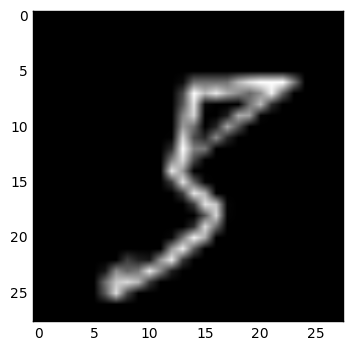

[3]


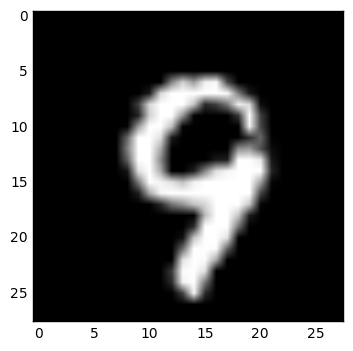

[9]


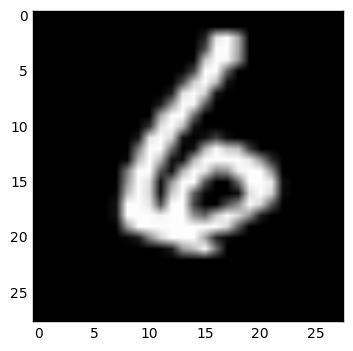

[6]


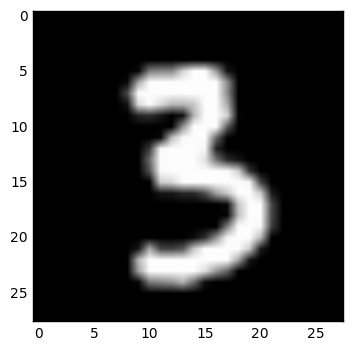

[3]


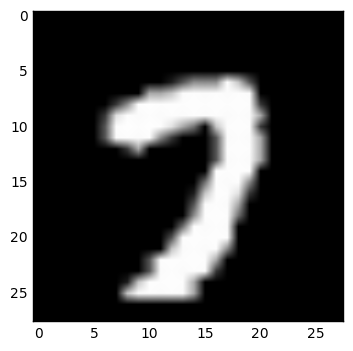

[7]


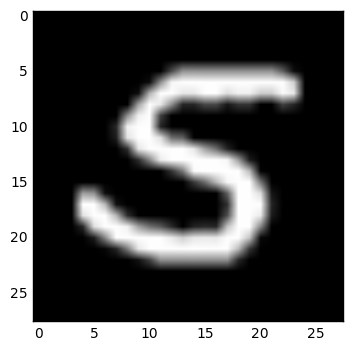

[5]


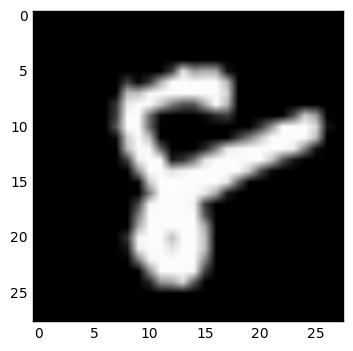

[8]


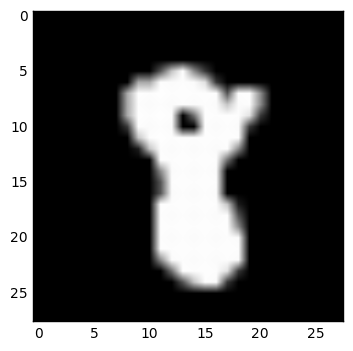

[8]


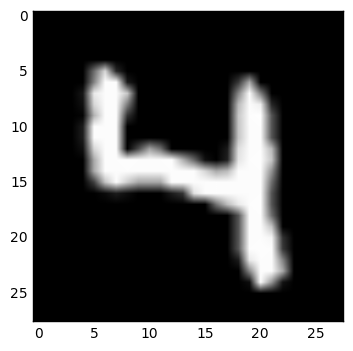

[4]


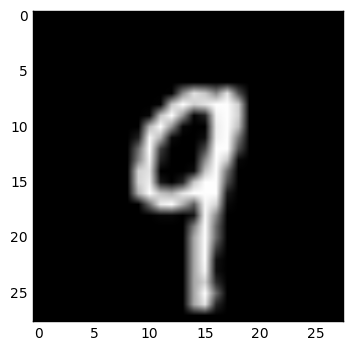

[9]


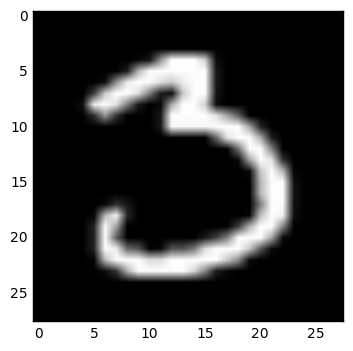

[3]


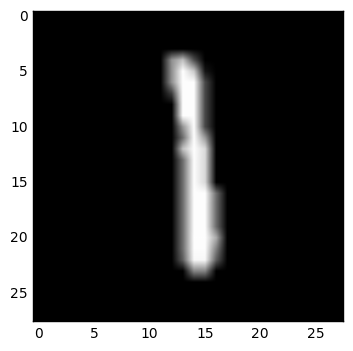

[1]


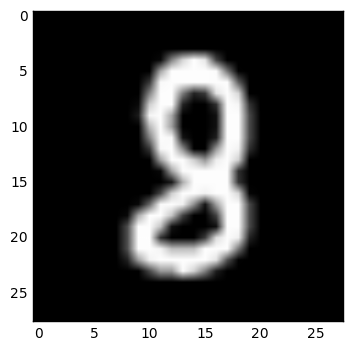

[8]


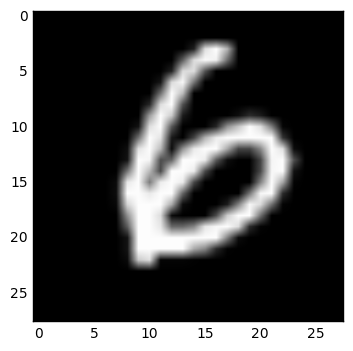

[6]


In [30]:
import matplotlib.pyplot as plt
for i in range(14):
    batch = mnist.train.next_batch(1)
    plotData = batch[0]
    plotData = plotData.reshape(28, 28)
    #plt.gray() # use this line if you don't want to see it in color
    plt.imshow(plotData)
    plt.show()

    answer = sess.run(Y, feed_dict={X: batch[0]})
    x  = sess.run(tf.argmax(answer, 1))
    print(x)